In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

In [46]:
#Du doan gia nha
DATA_LOADER = pd.read_csv('cadata.csv') #doc tap du lieu
DATA_ATTR = DATA_LOADER.iloc[:, 1:] #cac gia tri cua thuoc tinh 
DATA_VALUES = DATA_LOADER.iloc[:, 0] #cot gia tri
# print(DATA_ATTR)

In [47]:
#Khao sat du lieu
col_names = DATA_LOADER.columns
print("Tap dataset co {} thuoc tinh\nbao gom cac thuoc tinh: {}".format(col_names.size, ", ".join(np.array(col_names[1:]))))
print("Cot gia tri cua du lieu can du doan la: {}".format(col_names[0]))
print("Du lieu co {} dong".format(DATA_LOADER.shape[0]))

Tap dataset co 9 thuoc tinh
bao gom cac thuoc tinh: MEDIAN INCOME, HOUSE MEDIAN AGE, TOTAL ROOM, TOTAL BEDROOMS, POPULATION, HOUSEHOLDS, LATITUDE, LONGITUDE
Cot gia tri cua du lieu can du doan la: MEDIAN HOUSE VALUE
Du lieu co 20640 dong


In [48]:
#Thong ke du lieu
sts_data = [
    {"name_attr": name_attr,
     "statis": {"mean": DATA_ATTR[name_attr].mean(),
                "std_dev": DATA_ATTR[name_attr].std(),
                "median": DATA_ATTR[name_attr].median()}
    } for name_attr in col_names[1: ]
]

# print(sts_data[0])

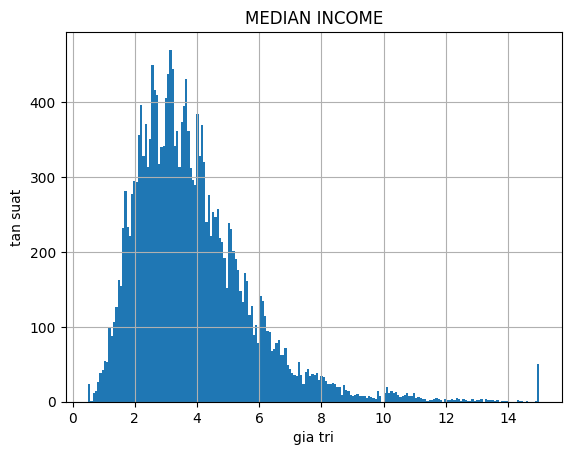

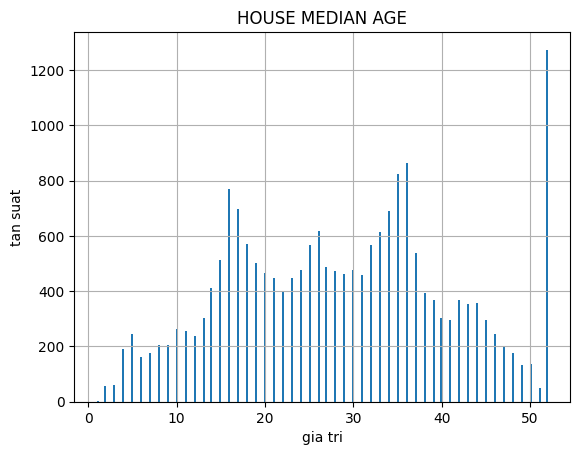

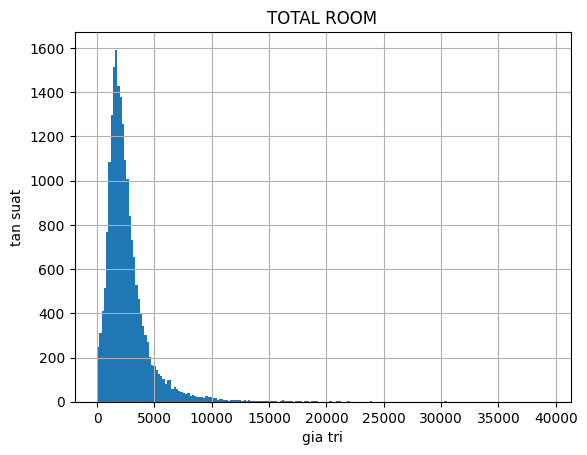

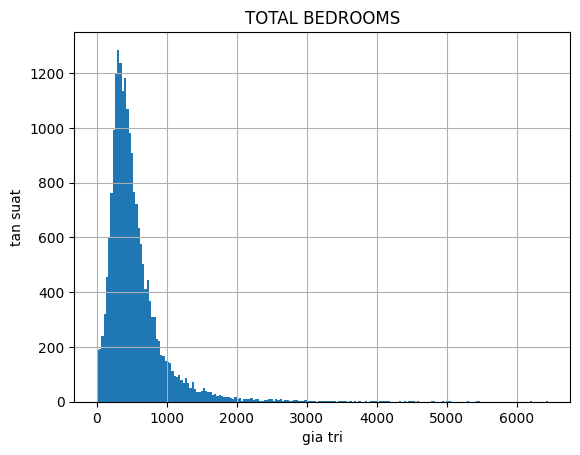

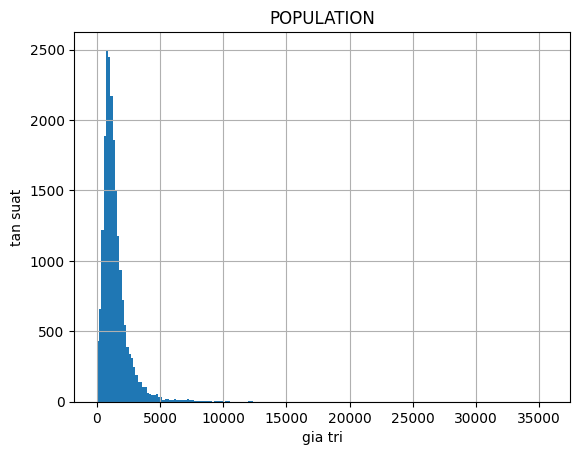

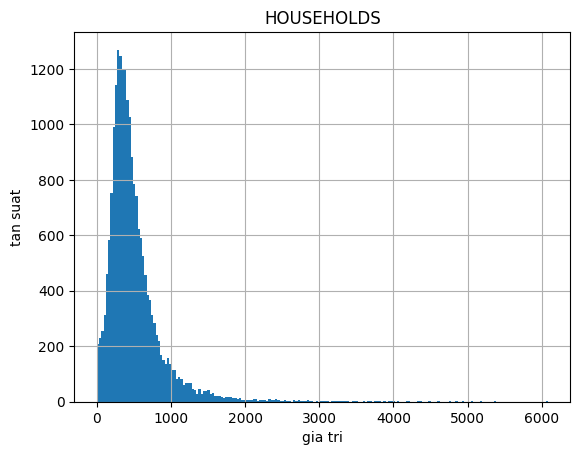

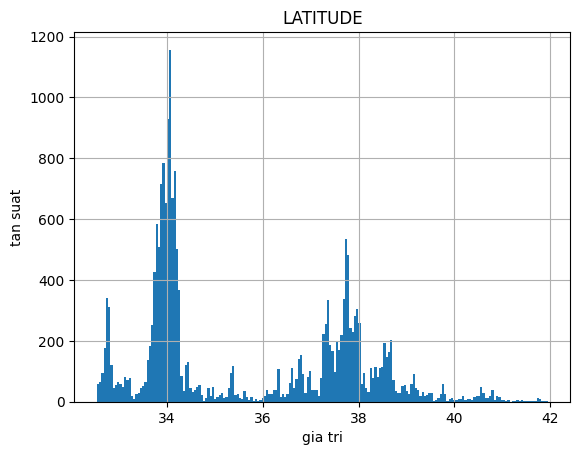

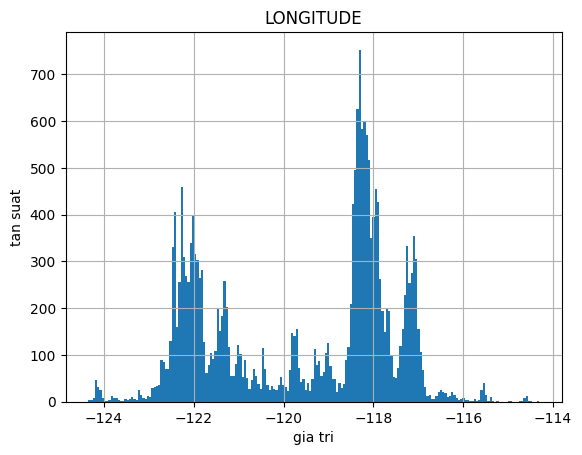

In [49]:
#Ve histogram
for attr in col_names[1: ]:
    values = np.array(DATA_ATTR[attr])
    plt.hist(values, bins=200)
    plt.title(attr)
    plt.xlabel('gia tri')
    plt.ylabel('tan suat')
    plt.grid(True)
    plt.show()

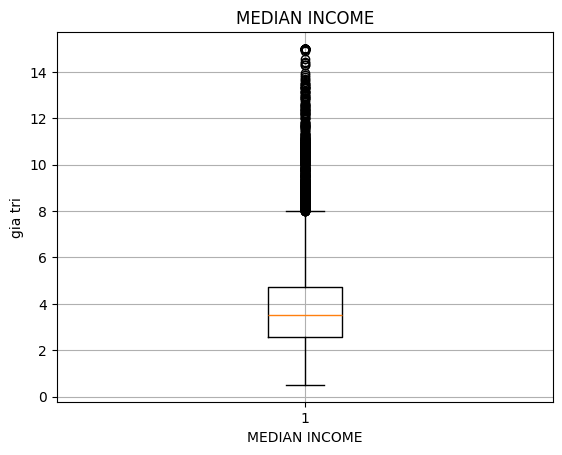

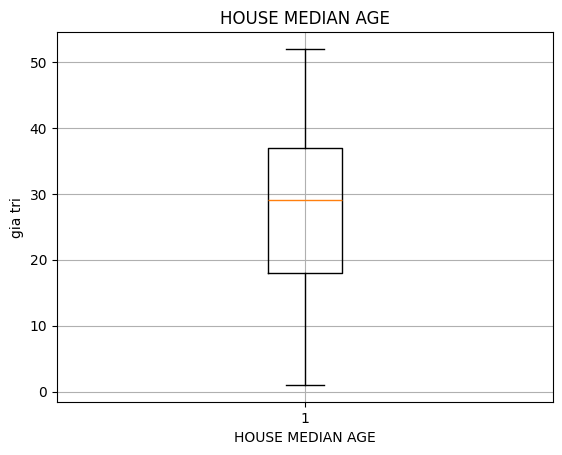

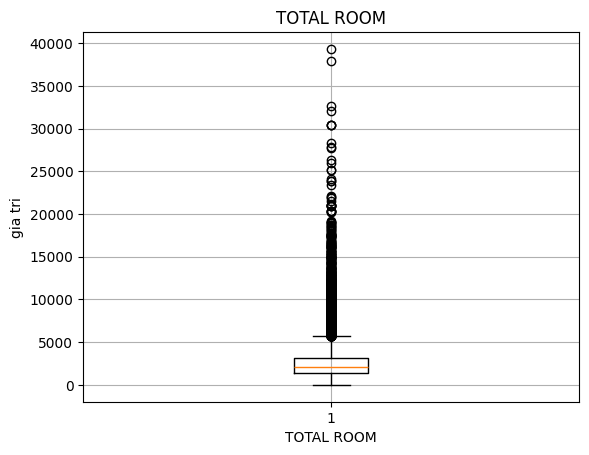

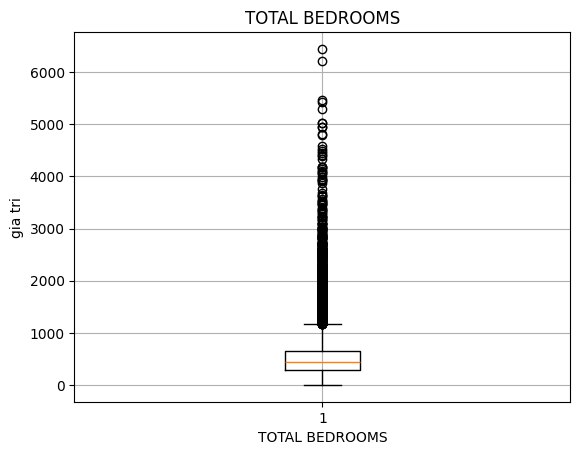

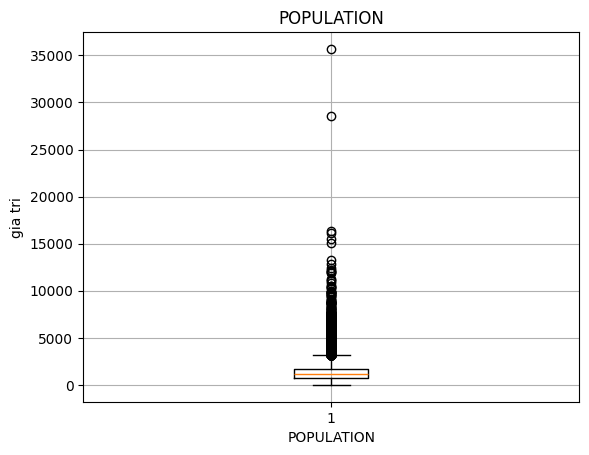

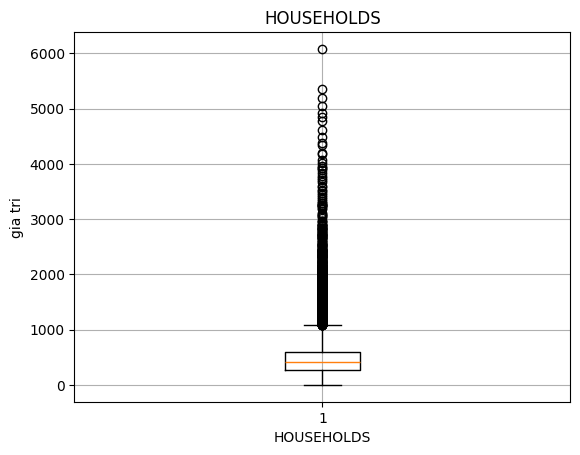

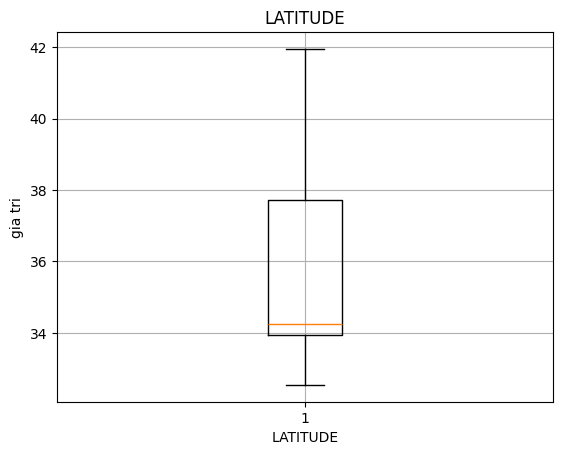

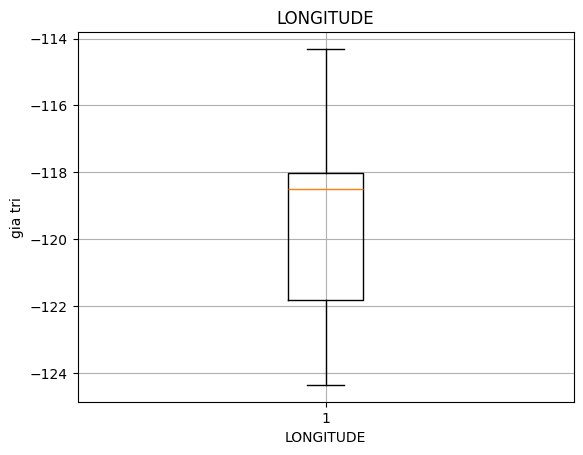

In [50]:
#Ve boxplot
for attr in col_names[1: ]:
    values = np.array(DATA_ATTR[attr])
    plt.boxplot(values)
    plt.title(attr)
    plt.xlabel(attr)
    plt.ylabel('gia tri')
    plt.grid(True)
    plt.show()

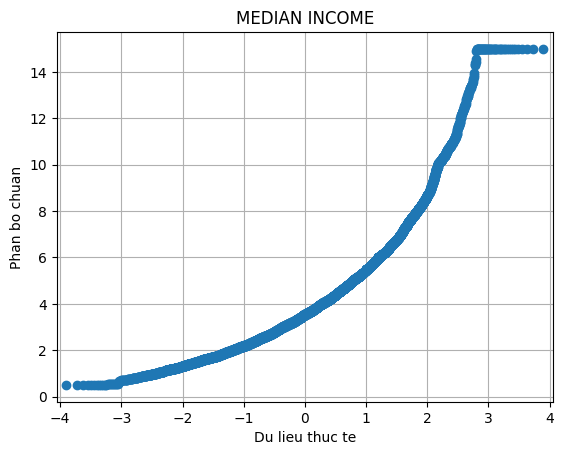

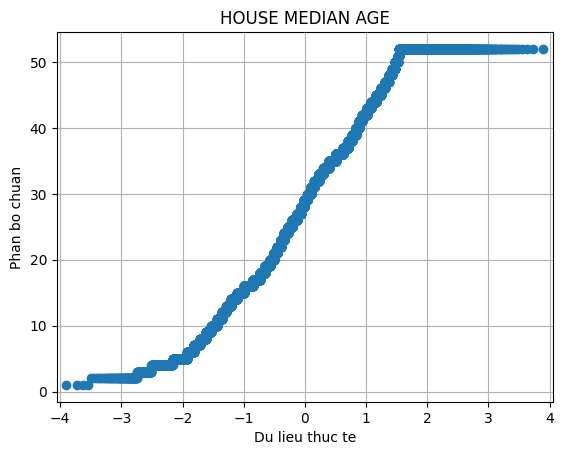

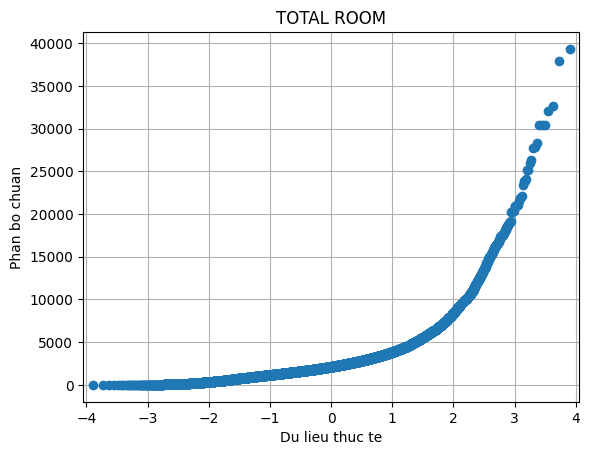

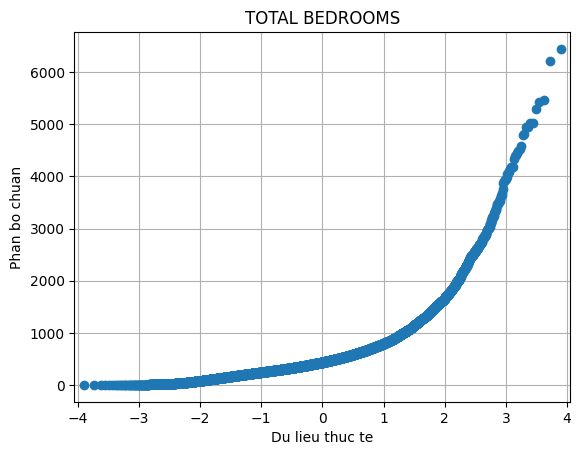

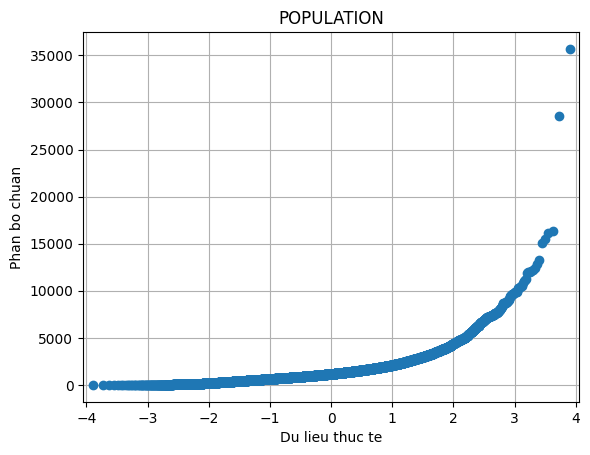

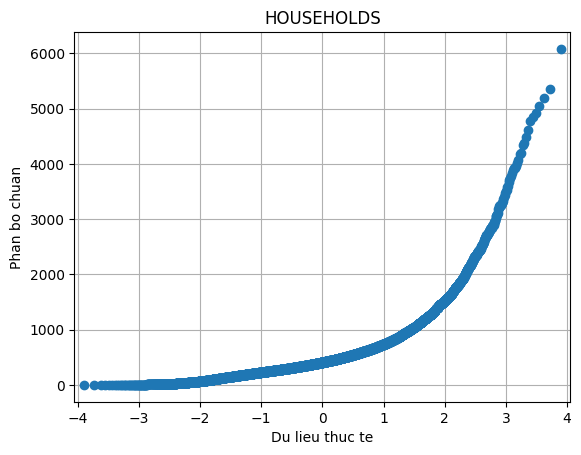

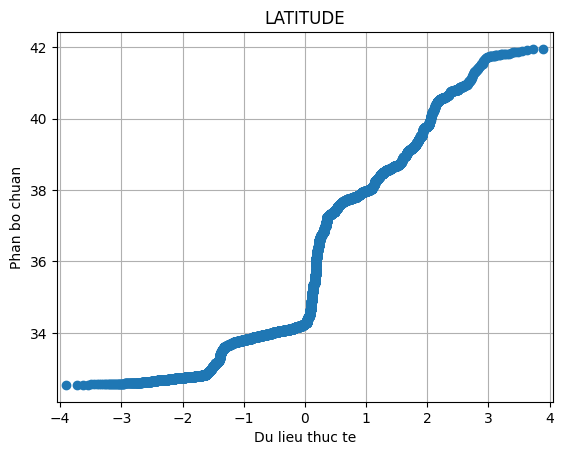

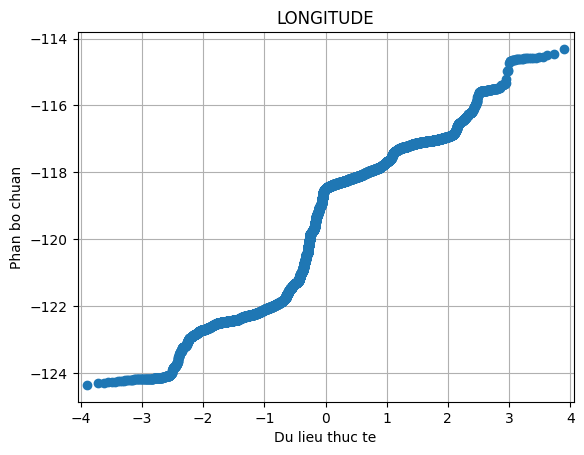

In [51]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
for attr in col_names[1: ]:
    values = np.array(DATA_ATTR[attr])
    sm.qqplot(values)    
    plt.title(attr)
    plt.xlabel("Du lieu thuc te")
    plt.ylabel('Phan bo chuan')
    plt.grid(True)
    plt.show()

In [66]:
#su dung KNN thuong
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUES, test_size=0.2, train_size=0.8, shuffle=True)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(round(sqrt(mean_squared_error(y_test, y_predict)))))
print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))



MSE: 9749007002.089651
RMSE: 98737
MAE: 75930.42790697675


In [ ]:
#hoi quy su dung KNN cho du lieu lien tuc
#voting = tong trung binh gia tri K diem du lieu
#su dung nghi thuc K-Fold
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import numpy as np
from statistics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5)

kfold = KFold(n_splits=5, shuffle=True)
arr_mae = []
arr_mse = []

#lap qua K-Fold
for train_index, test_index in kfold.split(DATA_ATTR):
    X_train, X_test = DATA_ATTR.iloc[train_index], DATA_ATTR.iloc[test_index]
    y_train, y_test = DATA_VALUES.iloc[train_index], DATA_VALUES.iloc[test_index]
    
    knn.fit(X_train, y_train) #train mo hinh
    y_predict = knn.predict(X_test)

